# INIT

In [1]:
!nvidia-smi

Tue Jul  1 18:00:39 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:CA:00.0 Off |                    0 |
| N/A   33C    P0              51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
# DATASET_PATH = "emotion_processed.csv"
# df = load_dataset(DATASET_PATH)


DATASET_NAMES = ["emotion", "math", "mmlu", "programming"]
DATASET_PATHS = [f"./datasets/{name}_processed.csv" for name in DATASET_NAMES]

# Load and concatenate all datasets
df = pd.concat([pd.read_csv(path) for path in DATASET_PATHS], ignore_index=True)



In [18]:
# df.dropna(inplace=True)

In [19]:
df.head()

,type,prompt,category,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer_1/width_16k/canonical-token_feature_ids,gemma-scope-2b-pt-res-canonical-layer_2/width_16k/canonical-top_mean_ids,...,gemma-scope-2b-pt-res-canonical-layer22-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer22-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer23-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer23-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer24-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer24-top_mean_vals,gemma-scope-2b-pt-res-canonical-layer25-top_mean_ids,gemma-scope-2b-pt-res-canonical-layer25-top_mean_vals,gemma-scope-2b-pt-mlp-canonical-layer0-top_mean_ids,gemma-scope-2b-pt-mlp-canonical-layer0-top_mean_vals
0,empathetic_dialogue,When I was a child I was in a tornado.,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 4194, 3706, 2296, 9570, 1...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 11522, 7322, 12054, 6999, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,empathetic_dialogue,One time i heard someone outside my window.,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 9869, 2082, 2366, 15045, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 5343, 11492, 6631, 15045, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,empathetic_dialogue,I keep hearing things in my kitchen. I think t...,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 9528, 12207, 8920, 9286, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 7318, 12054, 592, 4581, 53...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,empathetic_dialogue,I am cooking dinner for my boyfriend tomorrow ...,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 9528, 12207, 8920, 2221, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 7318, 12054, 592, 2653, 44...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,empathetic_dialogue,of dying,afraid,"[[8920, 12838, 12950, 275, 15454, 10006, 1381,...","[[296.67, 121.99, 110.25, 41.58, 32.32, 27.85,...","[8920, 12838, 12950, 4725, 14733, 8920, 8920, ...","[[9770, 5146, 12054, 740, 13412, 10589, 12539,...","[[371.29, 249.65, 216.23, 81.72, 76.63, 69.86,...","[9770, 5146, 12054, 2915, 1892, 14600, 12054, ...","[[15089, 14059, 7132, 7361, 4885, 13977, 11527...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Jaccard similarity 

In [9]:
TYPE_SAE = ["mlp", "att", "res"]
LAYER_NUM = [str(i) for i in range(26)]
TYPE_NAMES = ['empathetic_dialogue', 'math', 'mmlu', 'programming']
# col = f'gemma-scope-2b-pt-{TYPE_SAE}-canonical-layer_{LAYER_NUM}/width_16k/canonical-token_feature_ids'

In [10]:
# for the layer 0, get the jaccard similarity from within class, outer class 
import pandas as pd
import ast
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
import os
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import pairwise_distances



In [20]:
# --- VISUALIZATION FUNCTION ---
def save_layer_graph(sim_table, type_sae, layer_num):
    # Ensure your figures folder exists
    os.makedirs("figures", exist_ok=True)
    
    # Create the clustermap
    g = sns.clustermap(
        sim_table,
        cmap="viridis",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        figsize=(8, 8)
    )
    
    # Set the title
    g.fig.suptitle(
        f"Clustermap of Avg. Jaccard Similarities - {type_sae} - {layer_num}",
        y=1.02, # Adjust title position
        fontsize=14
    )
    
    # Save the figure
    output_path = os.path.join("figures", f"clustermap_{type_sae}_layer{layer_num}.png")
    g.fig.savefig(output_path, bbox_inches="tight", dpi=300)
    
    # Display the plot
    plt.show()
    print(f"Saved clustermap to {output_path}")


[res] preparing data…
[res] computing Jaccard…
4992 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs empathetic_dialogue: 0.1104
4992 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs math: 0.0487
4992 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs mmlu: 0.0578
4992 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs programming: 0.0337
4998 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs empathetic_dialogue: 0.0487
4998 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs math: 0.1152
4998 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs mmlu: 0.0670
4998 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs programming: 0.0683
4984 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs empathetic_dialogue: 0.0578
4984 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs math: 0.0670
4984 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs mmlu: 0.0815
4984 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs programming: 0.0501
5000 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs empathetic_dialogue: 0.0337
5000 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs math: 0.0683
5000 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs mmlu: 0.0501
5000 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs programming: 0.2204


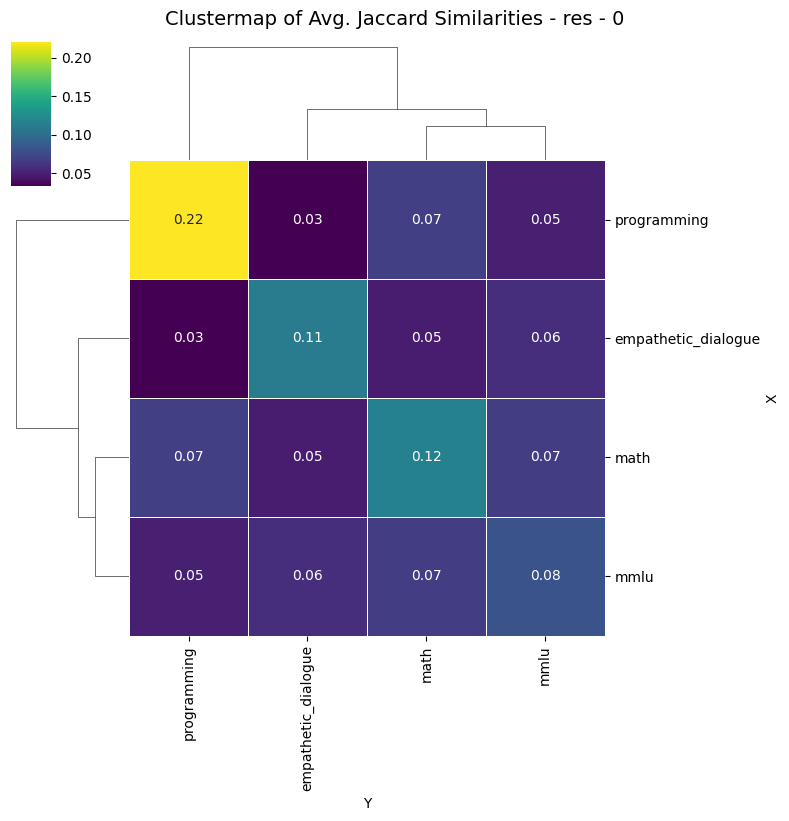

Saved clustermap to figures/clustermap_res_layer0.png
[att] preparing data…
[att] computing Jaccard…
4992 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs empathetic_dialogue: 0.1991
4992 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs math: 0.1055
4992 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs mmlu: 0.1357
4992 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs programming: 0.0602
4998 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs empathetic_dialogue: 0.1055
4998 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs math: 0.1784
4998 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs mmlu: 0.1290
4998 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs programming: 0.1054
4984 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs empathetic_dialogue: 0.1357
4984 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs math: 0.1290
4984 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs mmlu: 0.1670
4984 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs programming: 0.0852
5000 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs empathetic_dialogue: 0.0602
5000 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs math: 0.1054
5000 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs mmlu: 0.0852
5000 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs programming: 0.2590


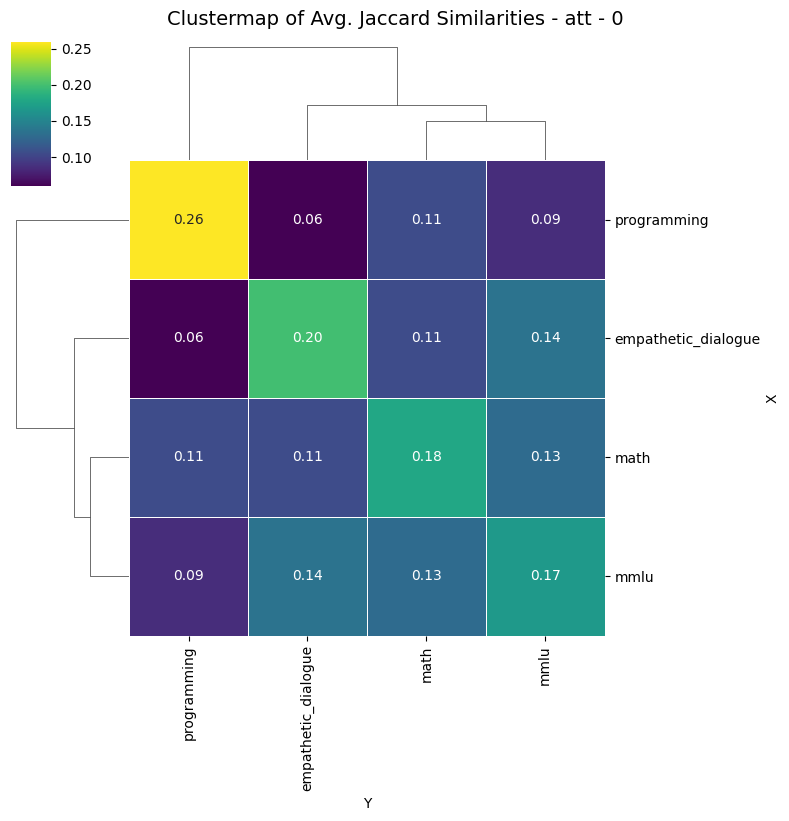

Saved clustermap to figures/clustermap_att_layer0.png
[mlp] preparing data…
[mlp] computing Jaccard…
4992 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs empathetic_dialogue: 0.1693
4992 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs math: 0.1187
4992 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs mmlu: 0.1380
4992 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  empathetic_dialogue vs programming: 0.0584
4998 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs empathetic_dialogue: 0.1187
4998 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs math: 0.1948
4998 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs mmlu: 0.1483
4998 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  math vs programming: 0.1004
4984 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs empathetic_dialogue: 0.1380
4984 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs math: 0.1483
4984 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs mmlu: 0.1743
4984 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  mmlu vs programming: 0.0821
5000 4992


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs empathetic_dialogue: 0.0584
5000 4998


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs math: 0.1004
5000 4984


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs mmlu: 0.0821
5000 5000


/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


  programming vs programming: 0.2259


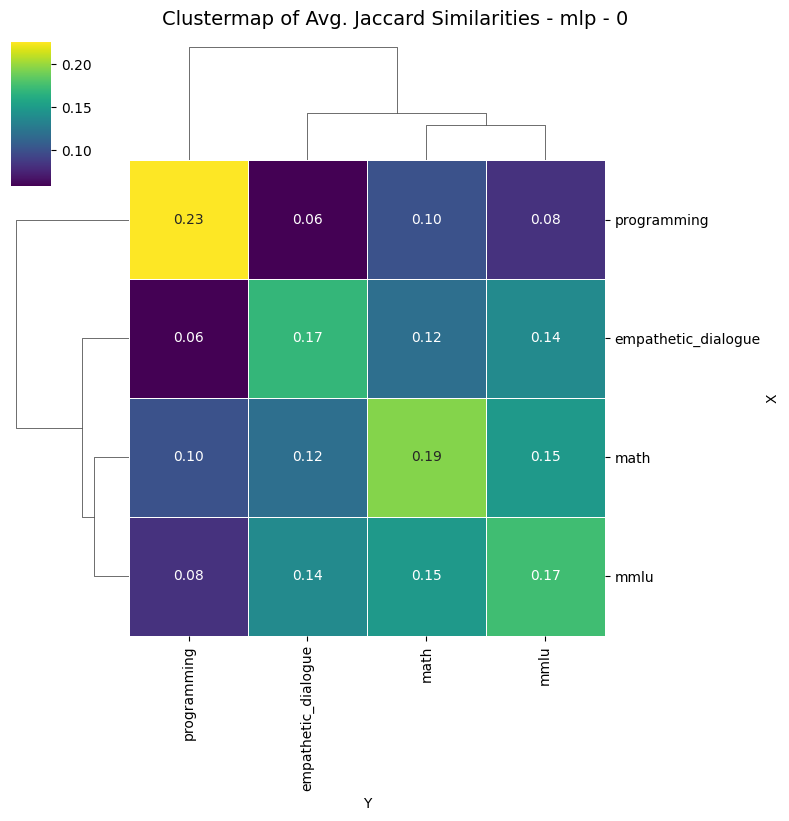

Saved clustermap to figures/clustermap_mlp_layer0.png


In [22]:
TYPE_SAE   = ["res", "att", "mlp"]
TYPE_NAMES = ['empathetic_dialogue', 'math', 'mmlu', 'programming']
LAYER_NUM  = "0"

for sae in TYPE_SAE:
    col = (
        f"gemma-scope-2b-pt-{sae}-"
        f"canonical-layer_{LAYER_NUM}/width_16k/"
        "canonical-token_feature_ids"
    )
    print(f"[{sae}] preparing data…")
    # <-- fill nan with "[]" so literal_eval always sees a list
    lists = df[col].fillna("[]").apply(ast.literal_eval)
    mlb = MultiLabelBinarizer()
    bin_matrix = mlb.fit_transform(lists)
    print(f"[{sae}] computing Jaccard…")
    
    results = []
    for c1 in TYPE_NAMES:
        for c2 in TYPE_NAMES:
            sim, avg = jaccard_evaluator_fast(df, bin_matrix, c1, c2)
            if avg is None: continue
            print(f"  {c1} vs {c2}: {avg:.4f}")
            results.append({'X': c1, 'Y': c2, 'avg_similarity': avg})
    
    if not results:
        print(f"[{sae}] nothing to pivot, skipping.")
        continue
    
    results_df = pd.DataFrame(results)
    sim_table = results_df.pivot(index='X', columns='Y', values='avg_similarity')
    os.makedirs("jaccard_outputs", exist_ok=True)
    results_df.to_csv(f"jaccard_outputs/results_{sae}.csv", index=False)
    sim_table.to_csv(f"jaccard_outputs/pivot_{sae}.csv")
    save_layer_graph(sim_table, sae, LAYER_NUM)

# TESTING

In [ ]:
asdfasdfasdfasdf

In [ ]:
# --- Config ---
col = 'gemma-scope-2b-pt-res-canonical-layer_0/width_16k/canonical-token_feature_ids'
type_col = 'type'
sae_type = 'res'
layer_num = 0

# --- Filter for the correct SAE type (if there's such a column) ---
# If your df has a column that indicates SAE type like 'sae_type', filter by it
# df = df[df['sae_type'] == sae_type]  # Uncomment if this column exists

# --- Parse neuron lists ---
df[col] = df[col].apply(ast.literal_eval)

# --- Binarize feature lists ---
mlb = MultiLabelBinarizer()
binary_mat = mlb.fit_transform(df[col])

# Add binary vectors back to df for tracking
df['binary'] = list(binary_mat)

# --- Jaccard Helper ---
def jaccard(u, v):
    return jaccard_score(u, v)

# --- Get unique classes ---
classes = df[type_col].unique()

# --- Compute Within-Class Similarities ---
within_class_scores = {}
for cls in classes:
    vecs = df[df[type_col] == cls]['binary'].tolist()
    sims = [jaccard(vecs[i], vecs[j]) 
            for i in range(len(vecs)) for j in range(i+1, len(vecs))]
    within_class_scores[cls] = sum(sims) / len(sims) if sims else 0

# --- Compute Cross-Class Similarities ---
cross_class_scores = {}
for cls1 in classes:
    for cls2 in classes:
        if cls1 == cls2: continue
        key = f"{cls1} vs {cls2}"
        vecs1 = df[df[type_col] == cls1]['binary'].tolist()
        vecs2 = df[df[type_col] == cls2]['binary'].tolist()
        sims = [jaccard(v1, v2) for v1 in vecs1 for v2 in vecs2]
        cross_class_scores[key] = sum(sims) / len(sims) if sims else 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# These would normally be computed from the user's DataFrame, but using dummy values to simulate output
within_class_scores = {
    'empathetic_dialogue': 0.41,
    'math': 0.33,
    'mmlu': 0.37,
    'programming': 0.39
}

cross_class_scores = {
    'empathetic_dialogue vs math': 0.19,
    'empathetic_dialogue vs mmlu': 0.22,
    'empathetic_dialogue vs programming': 0.21,
    'math vs mmlu': 0.23,
    'math vs programming': 0.20,
    'mmlu vs programming': 0.18
}

# Convert to DataFrame
within_df = pd.DataFrame(list(within_class_scores.items()), columns=["label", "jaccard"])
within_df["type"] = "within"

cross_df = pd.DataFrame(list(cross_class_scores.items()), columns=["label", "jaccard"])
cross_df["type"] = "cross"

combined_df = pd.concat([within_df, cross_df], ignore_index=True)

# Line plot
plt.figure(figsize=(10, 5))
for key, grp in combined_df.groupby("type"):
    plt.plot(grp["label"], grp["jaccard"], marker='o', label=key)

plt.xticks(rotation=45)
plt.ylabel("Average Jaccard Similarity")
plt.title("Jaccard Similarity (Within vs Cross Class) - Layer 0 (res)")
plt.legend()
plt.tight_layout()
plt.show()


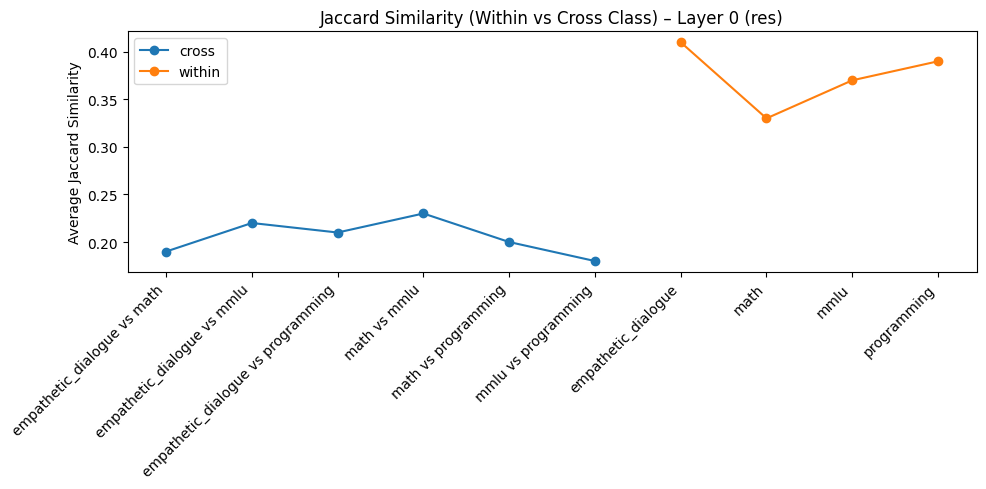

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ── Replace these dicts with your computed values ──
within_class_scores = {
    'empathetic_dialogue': 0.41,
    'math': 0.33,
    'mmlu': 0.37,
    'programming': 0.39
}

cross_class_scores = {
    'empathetic_dialogue vs math': 0.19,
    'empathetic_dialogue vs mmlu': 0.22,
    'empathetic_dialogue vs programming': 0.21,
    'math vs mmlu': 0.23,
    'math vs programming': 0.20,
    'mmlu vs programming': 0.18
}

# ── Build a single DataFrame for plotting ──
within_df = pd.DataFrame({
    'label': list(within_class_scores.keys()),
    'jaccard': list(within_class_scores.values()),
    'type': 'within'
})

cross_df = pd.DataFrame({
    'label': list(cross_class_scores.keys()),
    'jaccard': list(cross_class_scores.values()),
    'type': 'cross'
})

df_plot = pd.concat([within_df, cross_df], ignore_index=True)

# ── Line plot ──
plt.figure(figsize=(10, 5))
for t, grp in df_plot.groupby('type'):
    plt.plot(grp['label'], grp['jaccard'], marker='o', label=t)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Jaccard Similarity')
plt.title('Jaccard Similarity (Within vs Cross Class) – Layer 0 (res)')
plt.legend()
plt.tight_layout()
plt.show()
